<a href="https://colab.research.google.com/github/TheLohia/Phteven/blob/devtest/notebooks/resnet_eval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [123]:
# !pip install wandb

In [124]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, ConfusionMatrixDisplay, classification_report

# Metrics on the Prediction File

In [125]:
def evaluate_model(predict):
  print(f"Classification Report:\n{classification_report(predict['label'], predict['predict'])}")
  precision, recall, f1_score, support = precision_recall_fscore_support(predict['label'], predict['predict'], average="weighted")
  print(f"Precision: {precision}\nRecall: {recall}\nF1 Score: {f1_score}\nSupport: {support}")
  cm = confusion_matrix(predict['label'], predict['predict'], labels= [0,1,2])
  print(f"\nConfusion Matrix")
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["SPOILED", "HALF-FRESH", "FRESH"])
  disp.plot()
  plt.show()
  mcc = np.array([[0, 499.8, 99.9], [4.5, 0, 3.5],[9, 4, 0]])
  print(f"\nMCC Array\n{mcc}")
  ev_array = np.multiply(cm, mcc)
  print(f"\nEC Array\n{ev_array}\n")
  ev = np.sum(ev_array)
  print(f"Expected Cost of Misclassification: {ev}")


In [126]:
predict_fe = pd.read_csv("/content/drive/MyDrive/BT5153 Applied Project/trained_models/resnet18_test_predict_fe.csv", index_col=0)
predict_ft = pd.read_csv("/content/drive/MyDrive/BT5153 Applied Project/trained_models/resnet18_test_predict_ft.csv", index_col=0)
predict_ft_5e = pd.read_csv("/content/drive/MyDrive/BT5153 Applied Project/trained_models/resnet18_test_predict_ft_5e.csv", index_col=0)
predict_fe_5e = pd.read_csv("/content/drive/MyDrive/BT5153 Applied Project/trained_models/resnet18_test_predict_fe_5e.csv", index_col=0)
predict_50_fe = pd.read_csv("/content/drive/MyDrive/BT5153 Applied Project/trained_models/resnet50_test_predict.csv", index_col=0)

Classification Report:
              precision    recall  f1-score   support

           0       0.78      1.00      0.87       114
           1       0.97      0.71      0.82       159
           2       0.91      0.96      0.93       178

    accuracy                           0.88       451
   macro avg       0.88      0.89      0.87       451
weighted avg       0.90      0.88      0.88       451

Precision: 0.8953225003272517
Recall: 0.8802660753880266
F1 Score: 0.8771398630788181
Support: None

Confusion Matrix


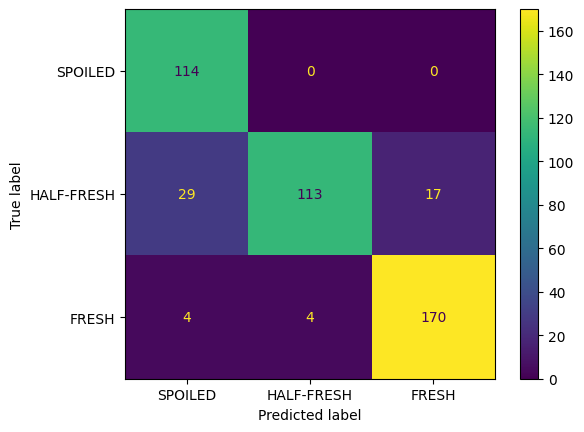


MCC Array
[[  0.  499.8  99.9]
 [  4.5   0.    3.5]
 [  9.    4.    0. ]]

EC Array
[[  0.    0.    0. ]
 [130.5   0.   59.5]
 [ 36.   16.    0. ]]

Expected Cost of Misclassification: 242.0


In [127]:
#best model so far. ResNet50, 5 epochs, LR=0.001, Batch Size =32, Criterion: CrossEntrorpy, Optimizer: Adam
evaluate_model(predict_50_fe)

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       114
           1       0.97      0.61      0.75       159
           2       0.79      0.99      0.88       178

    accuracy                           0.85       451
   macro avg       0.88      0.86      0.85       451
weighted avg       0.87      0.85      0.84       451

Precision: 0.8730042974118258
Recall: 0.8514412416851441
F1 Score: 0.842504810968333
Support: None

Confusion Matrix


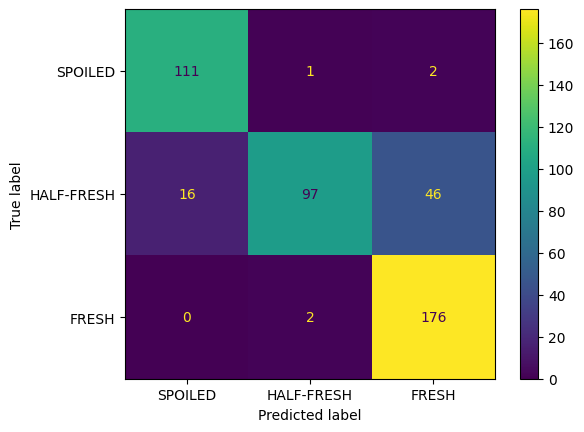


MCC Array
[[  0.  499.8  99.9]
 [  4.5   0.    3.5]
 [  9.    4.    0. ]]

EC Array
[[  0.  499.8 199.8]
 [ 72.    0.  161. ]
 [  0.    8.    0. ]]

Expected Cost of Misclassification: 940.6


In [128]:
evaluate_model(predict_fe)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95       114
           1       0.92      0.89      0.90       159
           2       0.89      0.98      0.93       178

    accuracy                           0.93       451
   macro avg       0.94      0.92      0.93       451
weighted avg       0.93      0.93      0.93       451

Precision: 0.9298451906773284
Recall: 0.926829268292683
F1 Score: 0.9268346822883687
Support: None

Confusion Matrix


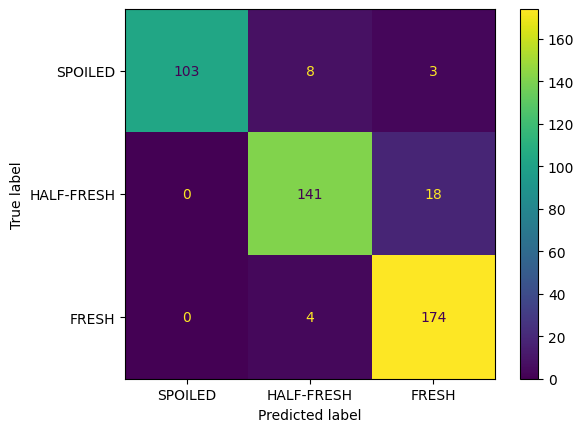


MCC Array
[[  0.  499.8  99.9]
 [  4.5   0.    3.5]
 [  9.    4.    0. ]]

EC Array
[[   0.  3998.4  299.7]
 [   0.     0.    63. ]
 [   0.    16.     0. ]]

Expected Cost of Misclassification: 4377.1


In [129]:
evaluate_model(predict_ft)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95       114
           1       0.89      0.92      0.90       159
           2       0.93      0.96      0.94       178

    accuracy                           0.93       451
   macro avg       0.94      0.93      0.93       451
weighted avg       0.93      0.93      0.93       451

Precision: 0.9332682300324512
Recall: 0.9312638580931264
F1 Score: 0.9316097774838384
Support: None

Confusion Matrix


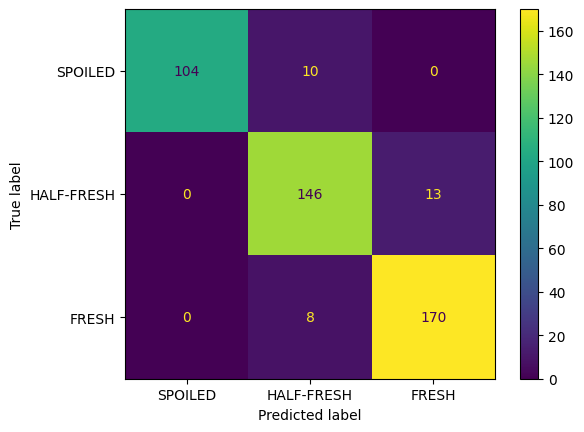


MCC Array
[[  0.  499.8  99.9]
 [  4.5   0.    3.5]
 [  9.    4.    0. ]]

EC Array
[[   0.  4998.     0. ]
 [   0.     0.    45.5]
 [   0.    32.     0. ]]

Expected Cost of Misclassification: 5075.5


In [130]:
evaluate_model(predict_ft_5e)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       114
           1       0.89      0.58      0.71       159
           2       0.76      0.94      0.84       178

    accuracy                           0.83       451
   macro avg       0.85      0.84      0.83       451
weighted avg       0.84      0.83      0.82       451

Precision: 0.839568510212486
Recall: 0.8270509977827051
F1 Score: 0.8174690292893723
Support: None

Confusion Matrix


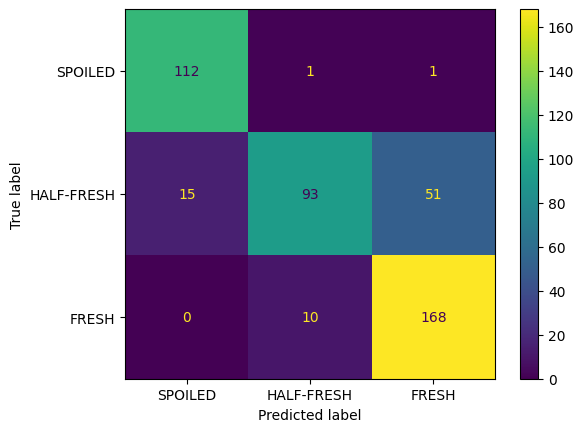


MCC Array
[[  0.  499.8  99.9]
 [  4.5   0.    3.5]
 [  9.    4.    0. ]]

EC Array
[[  0.  499.8  99.9]
 [ 67.5   0.  178.5]
 [  0.   40.    0. ]]

Expected Cost of Misclassification: 885.7


In [131]:
evaluate_model(predict_fe_5e)